In [1]:
import numpy as np
import lasio
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [54]:
las=lasio.read("HRA digits.las")
las2=lasio.read("Processed_ShaleOilElan.las")
las3=lasio.read("RQL.las")
las4=lasio.read("Processed_SonicScanner_VTI.las")

In [57]:
las5=pd.read_excel("Dip.xlsx")

In [58]:
las5

,TDEP,ARRAY_WBI_1_DYNAMIC,ARRAY_WBI_1_DYNAMIC.1,ARRAY_WBI_1_DYNAMIC.2,AvgCali,Azimuth,CenteredDepth,Colour,Dip_TRU,HAzi,...,InfoArray[7],InfoArray[8],InfoArray[9],InfoArray[10],InfoArray[11],InfoArray[12],InfoArray[13],Quality,Shape,Type
0,12822.76667,42.642900,2.875838,0.043881,10.082140,69.22964,12822.76667,#0000FF,2.12850,6.252048,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,20,0,NONE
1,12823.38333,45.307070,2.874891,0.043882,10.085540,72.46781,12823.38333,#0000FF,2.18808,6.251576,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,20,0,NONE
2,12824.92500,50.652460,2.877794,0.043921,10.084490,78.68504,12824.92500,#0000FF,2.31271,6.252076,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,20,0,NONE
3,12826.06667,38.652650,2.873922,0.043855,10.082950,64.56499,12826.06667,#0000FF,2.03451,6.252072,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,20,0,NONE
4,12826.70000,72.010850,2.881764,0.043973,10.082460,99.78282,12826.70000,#0000FF,2.82504,6.251723,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,20,0,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,15537.83333,340.403000,3.416203,0.046095,8.866179,282.93870,15537.83333,#008000,0.91185,6.198250,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,20,0,Bedding
1816,15538.70833,356.661200,3.350931,0.045075,8.837965,10.94357,15538.70833,#008000,0.33628,6.197476,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,20,0,Bedding
1817,15539.36667,355.308100,3.463997,0.045953,8.711069,357.15130,15539.36667,#008000,0.43821,6.196636,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,20,0,Bedding
1818,15542.05000,7.390082,5.350781,0.068514,8.378124,22.83368,15542.05000,#008000,2.50492,6.188342,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,20,0,Bedding


In [3]:
las.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="3", descr="CWLS LOG ASCII STANDA...),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH S...),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="DELIMITING CHARACT...)],
 'Well': [HeaderItem(mnemonic="STRT", unit="ft", value="14000", descr="First reference...),
  HeaderItem(mnemonic="STOP", unit="ft", value="15490", descr="Last reference ...),
  HeaderItem(mnemonic="STEP", unit="ft", value="0.5", descr="Step increment"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999", descr="Missing value"),
  HeaderItem(mnemonic="WELL", unit="", value="Lane 64-1", descr="Well name"),
  HeaderItem(mnemonic="COMP", unit="COMP", value="DEVON ENERGY CORPORATION", d...),
  HeaderItem(mnemonic="FLD", unit="FLD", value="ETHEL", descr=""),
  HeaderItem(mnemonic="API", unit="API", value="17-037-20149", descr=""),
  HeaderItem(mnemonic="COUNTRY", unit="COUNTRY", value="USA", descr=""),
  HeaderItem(mnemonic="SRVC

In [7]:
df_hra = las.df()
df_elan = las2.df()
df_rql=las3.df()
df_sp=las4.df()

In [8]:
def tms(df,form_top,form_bottom):
    df_tms=df[form_top:form_bottom]
    return df_tms

## SP clusters

In [9]:
df_stress=df_sp.loc[:,["SHMIN_VTI"]]

In [10]:
df_stress.reset_index(inplace=True)
df_stress.head()

,DEPT,SHMIN_VTI
0,12448.0,NaN
1,12448.5,NaN
2,12449.0,NaN
3,12449.5,NaN
4,12450.0,NaN


In [11]:
# cols = ['Depth','Effective porosity','Water saturation','Total clay','Quartz',
#         'Calcite','Kerogen','Oil','Water','Absolute permeability']
# df_rq.columns=cols

## TMS interval

In [13]:
df_tms=df_stress.loc[(df_stress['DEPT'] >= 15042) & (df_stress['DEPT'] <= 15250)]

In [61]:
df_tms_fractures=las5[["TDEP","Azimuth","Dip_TRU","Type"]].loc[(las5['TDEP'] >= 15042) & (las5['TDEP'] <= 15250)]

In [89]:
df_tms_fractures

,TDEP,Azimuth,Dip_TRU,Type
1568,15053.23333,187.60740,5.82906,0
1569,15053.40833,186.79630,5.69099,0
1570,15058.46667,209.09440,2.09106,0
1571,15060.71667,208.24590,2.22243,0
1572,15066.53333,211.52560,2.55561,0
1573,15067.36667,198.63360,2.68179,0
1574,15067.77500,198.58820,2.67955,0
1575,15073.82500,177.82960,5.02408,0
1576,15074.75833,176.76600,5.02983,0
1577,15093.47500,157.91220,4.77440,0


In [64]:
df_tms_fractures["Type"].value_counts()

Bedding               45
Resistive fracture    10
Name: Type, dtype: int64

In [69]:
df_tms_fractures.loc[df_tms_fractures[df_tms_fractures["Type"]=="Resistive fracture"].index,"Type"]=1

In [71]:
df_tms_fractures.loc[df_tms_fractures[df_tms_fractures["Type"]=="Bedding"].index,"Type"]=0

In [72]:
df_tms_fractures["Type"].value_counts()

0    45
1    10
Name: Type, dtype: int64

In [14]:
df_tms.describe()

,DEPT,SHMIN_VTI
count,417.000000,417.000000
mean,15146.000000,91279.809653
std,60.260891,4286.901145
min,15042.000000,77187.619539
25%,15094.000000,89459.379440
50%,15146.000000,90923.309865
75%,15198.000000,93653.505850
max,15250.000000,99425.102604


In [15]:
#df_tms.loc[df_tms[df_tms["Water saturation"]==1].index,"Water saturation"]=np.nan

In [16]:
#df_tms.describe()

In [17]:
#df_tms.dropna(inplace=True)

In [18]:
df_tms.reset_index(drop=True,inplace=True)
df_tms.head()

,DEPT,SHMIN_VTI
0,15042.0,91523.567133
1,15042.5,91822.496059
2,15043.0,91929.093093
3,15043.5,92018.411524
4,15044.0,91985.920426


## DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X=df_tms["SHMIN_VTI"]
#X = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples = 5)
clusters = dbscan.fit_predict(X.values.reshape(-1, 1))

# plt.scatter(X[:, 0], X[:, 0], c=clusters, cmap="plasma")
# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")

In [24]:
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

## K-Means

In [27]:
from sklearn.cluster import KMeans
X=df_tms["SHMIN_VTI"]

#X = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(X.values.reshape(-1, 1))
y_kmeans = kmeans.predict(X.values.reshape(-1, 1))

In [29]:
# plt.scatter(X[:, 0], X[:, 0], c=y_kmeans, cmap="plasma")
# plt.scatter(kmeans.cluster_centers_[:, 0],   
#             kmeans.cluster_centers_[:, 0],
#             marker='^', 
#             c=[0, 1, 2,3], 
#             s=100, 
#             linewidth=2,
#             cmap="plasma")

# plt.xlabel("Feature 0")
# plt.ylabel("Feature 1")

In [30]:
df_sp_cluster=pd.concat([df_tms,pd.DataFrame({'SP':y_kmeans})],axis=1)
df_sp_cluster

,DEPT,SHMIN_VTI,SP
0,15042.0,91523.567133,3
1,15042.5,91822.496059,3
2,15043.0,91929.093093,3
3,15043.5,92018.411524,3
4,15044.0,91985.920426,3
...,...,...,...
412,15248.0,89477.376105,1
413,15248.5,89951.246932,1
414,15249.0,90250.369508,1
415,15249.5,88742.146323,1


In [49]:
cols=['Depth','SHMIN_VTI','SP']
df_sp_cluster.columns=cols
df_sp_cluster

,Depth,SHMIN_VTI,SP
0,15042.0,91523.567133,3
1,15042.5,91822.496059,3
2,15043.0,91929.093093,3
3,15043.5,92018.411524,3
4,15044.0,91985.920426,3
...,...,...,...
412,15248.0,89477.376105,1
413,15248.5,89951.246932,1
414,15249.0,90250.369508,1
415,15249.5,88742.146323,1


In [32]:
df_sp_cluster["SP"].value_counts()

1    206
3     97
0     83
2     31
Name: SP, dtype: int64

In [37]:
def sp_props(df,i):
    df_sp=df[df["SP"]==i]
    return df_sp[['DEPT',"SHMIN_VTI"]].describe()

In [38]:
sp_props(df_sp_cluster,0)

,DEPT,SHMIN_VTI
count,83.000000,83.000000
mean,15122.355422,97187.789127
std,14.332619,1053.043794
min,15099.500000,95083.087381
25%,15109.750000,96413.965217
50%,15124.000000,96992.483708
75%,15134.250000,97819.853658
max,15147.000000,99425.102604


In [40]:
sp_props(df_sp_cluster,1)

,DEPT,SHMIN_VTI
count,206.00000,206.000000
mean,15139.00000,89669.202742
std,68.35806,1239.368550
min,15045.50000,85701.176494
25%,15074.12500,89117.172993
50%,15168.25000,89954.335087
75%,15199.87500,90602.117694
max,15250.00000,91288.249795


In [41]:
sp_props(df_sp_cluster,2)

,DEPT,SHMIN_VTI
count,31.000000,31.000000
mean,15234.000000,80983.113237
std,4.546061,2395.353805
min,15226.500000,77187.619539
25%,15230.250000,78859.839719
50%,15234.000000,80736.350304
75%,15237.750000,81888.558278
max,15241.500000,85014.504971


In [42]:
sp_props(df_sp_cluster,3)

,DEPT,SHMIN_VTI
count,97.000000,97.000000
mean,15152.974227,92935.689200
std,49.368901,929.976288
min,15042.000000,91318.640821
25%,15141.000000,92018.411524
50%,15158.500000,93139.110240
75%,15174.000000,93545.350339
max,15223.500000,94917.353743


In [43]:
sp_props(df_sp_cluster,2).loc['50%']

DEPT         15234.000000
SHMIN_VTI    80736.350304
Name: 50%, dtype: float64

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

facies_colors = ['blue', 'green','red','yellow']

facies_labels = [0,1,2,3]
#facies_color_map is a dictionary that maps facies labels
#to their respective colors

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

In [90]:
def make_facies_log_plot(logs,logs2, facies_colors):
    
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    bounds = [0,1,2,3,4]
    norm = colors.BoundaryNorm(bounds, cmap_facies.N)

    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['SP'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
    ax[0].plot(logs['SHMIN_VTI'], logs.Depth, '-g')
    ax[1].plot(logs2['Type'],logs2.TDEP, 'o')
    im=ax[2].imshow(cluster, interpolation='none', aspect='auto',
                        cmap=cmap_facies,norm=norm)
    
    divider = make_axes_locatable(ax[2])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join(['0','1','2', '3']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Minimum horizontal stress (VTI)")
    ax[0].set_xlim(logs['SHMIN_VTI'].min(),logs['SHMIN_VTI'].max())
    ax[1].set_xlabel("Fractures")
    ax[1].set_xlim(0.5,2)
    ax[2].set_xlabel('SP')
    
    ax[0].set_yticklabels([]); ax[1].set_yticklabels([]); ax[2].set_yticklabels([])
    ax[2].set_xticklabels([])
    #f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

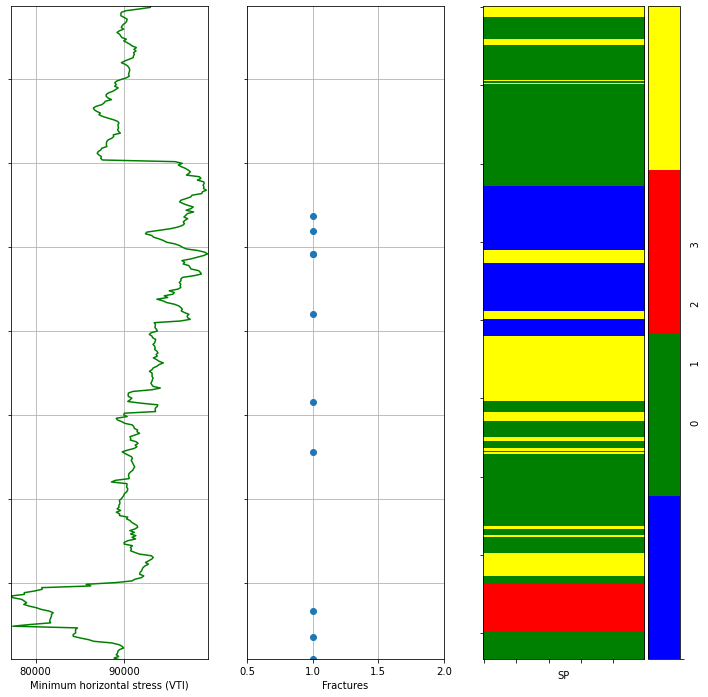

In [88]:
make_facies_log_plot(
    df_sp_cluster,df_tms_fractures,
    facies_colors)